# Simulations using Wanderlust

In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd, seaborn as sns, os

In [3]:
import numpy as np

In [4]:
from wishbone.wb import SCData, Wishbone
%matplotlib inline

/home/maxz/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [5]:
seeds = [8971, 3551, 3279, 5001, 5081]

In [6]:
def run_scdata(data):
    scdata = SCData(data)
    scdata.run_pca(15)
    scdata.run_tsne()
    scdata.run_diffusion_map()
    return scdata

## plot specific simulation

In [7]:
seed = 5001
file = "5001_5.csv"
data = pd.read_csv(os.path.join(str(seed), file), index_col=0)
data, labels = data.ix[:, :-1], data['labels']
seed, datasim = file.rstrip('.csv').split('_')

file = "5001_Xsim.csv"
Xsim = pd.read_csv(os.path.join(str(seed), file), index_col=0)

file_wb = "5001_5_wanderlust.csv"
wishbone = pd.read_csv(os.path.join(str(seed), file), index_col=0)

In [41]:
scdata = run_scdata(data.copy())
wb = Wishbone(scdata)
wb.run_wishbone(start_cell=0, branch=True)

If running in notebook, please look at the command line window for tSNE progress log
Building lNN graph...
lNN computed in : 0.07 seconds
Determining waypoints if not specified...
Determining shortest path distances and perspectives....
..........................................................................................................................................................................................................................................................
Time for determining distances and perspectives: 32.91 seconds
Determining branch point and branch associations...
Running iterations...
Iteration: 2
Correlation with previous iteration:  0.9985
Iteration: 3
Correlation with previous iteration:  0.9988
Iteration: 4
Correlation with previous iteration:  0.9986
Iteration: 5
Correlation with previous iteration:  0.9991
Iteration: 6
Correlation with previous iteration:  0.9995
Iteration: 7
Correlation with previous iteration:  0.9990
Iteration: 8
Correlation wi

In [42]:
from topslam.plotting import plot_landscape_other, plot_labels_other

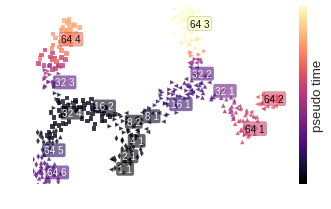

In [64]:
ulabels = np.unique(labels)

fig, ax = plt.subplots(figsize=(5,3))
X = scdata.tsne.values
pt = wb.trajectory.values
#X = Xsim[[0,1]].values
#pt = Xsim['time'].values

ax, pc = plot_landscape_other(X, pt, 
                     labels=labels.values, ulabels=ulabels, 
                     coloring='time', ax=ax)
plot_labels_other(X, pt, 
                     labels=labels.values, ulabels=ulabels, ax=ax)

from matplotlib.collections import PathCollection
cb1 = plt.colorbar(PathCollection(paths=[], array=pt, cmap='magma'), ax=ax, )
cb1.ax.set_frame_on(False)
cb1.set_ticks([])
cb1.set_label('pseudo time')
x_lim, y_lim = zip(X.min(0), X.max(0))
ax.set_xlim(x_lim)
ax.set_ylim(y_lim)
ax.set_axis_off()
fig.tight_layout()
fig.savefig('../../diagrams/simulation/Wanderlust_5001_5.pdf', transparent=True, bbox_inches='tight')

In [44]:
from scipy.stats import linregress

 /home/maxz/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning:using a non-integer number instead of an integer will result in an error in the future


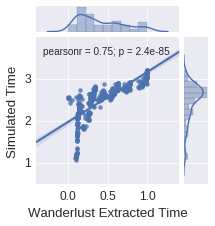

In [61]:
sns.set_style('darkgrid')
ax = sns.jointplot(wb.trajectory.values, Xsim.time.values, kind="reg", size=3, annot_kws=dict(loc="upper right", fontsize=10))
ax.ax_joint.set_xlabel('Wanderlust Extracted Time')
ax.ax_joint.set_ylabel('Simulated Time')
ax.ax_joint.set_xticks([0,.5,1])
ax.ax_joint.set_yticks([1,2,3])
ax.ax_joint.figure.savefig('../../diagrams/simulation/Wanderlust_time_{}_{}.pdf'.format(seed, 5), transparent=True, bbox_inches='tight')

In [50]:
# Run on all simulation data:

In [ ]:
for seed in seeds:
    print(seed, end=' ')
    for file in os.listdir(str(seed)):
        if file.endswith('.csv') and 'Xsim' not in file and 'wanderlust' not in file:
            data = pd.read_csv(os.path.join(str(seed), file), index_col=0)
            data, labels = data.ix[:, :-1], data['labels']
            seed, datasim = file.rstrip('.csv').split('_')
            print(datasim, end='')
            scdata = run_scdata(data.copy())
            wb = Wishbone(scdata)
            savedf = pd.DataFrame(columns=['Wanderlust', 'Wishborne'], index=data.index)
            success = False
            k = 15
            while not success:
                try:
                    wb.run_wishbone(start_cell=0, branch=False, k=k)
                    savedf['Wanderlust'] = wb.trajectory.copy()
                    print('+', end='')
                    success = True
                except:
                    k+=1

            success = False
            k = 15
            while not success:
                try:
                    wb.run_wishbone(start_cell=0, branch=True, k=k)
                    savedf['Wishborne'] = wb.trajectory.copy()
                    print('+', end='')
                    success = True
                except:
                    k+=1

            #except:
            #    print('-', end='')
            #try:
            #wb.run_wishbone(start_cell=0, branch=True, k=5)
            #savedf['Wishborne'] = wb.trajectory.copy()
            #print('+', end=' ')
            #except:
            #    print('-', end=' ')
            #    pass
            savedf.to_csv(os.path.join(str(seed), '{}_wanderlust.csv'.format(os.path.splitext(file)[0])))
    print()

In [ ]:
from scipy.stats import linregress

result_collection = pd.DataFrame(index=pd.MultiIndex.from_product(( list(map(str, seeds)), ['Wanderlust', 'Wishbone'], list(map(str, range(10))) )), columns=['rvalue', 'pvalue', 'stderr'])

for seed in seeds:
    Xsim = pd.read_csv(os.path.join(str(seed), '{}_Xsim.csv'.format(str(seed))), index_col=0)
    for file in os.listdir(str(seed)):
        if file.endswith('wanderlust.csv'):
            results = pd.read_csv(os.path.join(str(seed), file), index_col=0)
            seed, datasim = file.rstrip('_wanderlust.csv').split('_')
            lr = linregress(Xsim['time'], results['Wanderlust'])
            lr2 = linregress(Xsim['time'], results['Wishborne'])

            result_collection.loc[seed, 'Wanderlust', datasim] = [lr.rvalue, lr.pvalue, lr.stderr]
            result_collection.loc[seed, 'Wishbone', datasim] = [lr2.rvalue, lr2.pvalue, lr2.stderr]

In [ ]:
result_collection.to_csv('wanderlust.csv')

In [ ]:
sns.boxplot(data=result_collection.reset_index(), x='level_0', y='rvalue', hue='level_1')

# Guo et al:

In [7]:
guo_data = pd.read_csv('../../notebook/Guo/singlecellGuo.csv', index_col=0)
labels = guo_data.index.values
guo_data.index = range(guo_data.shape[0])

In [8]:
scdata = run_scdata(guo_data.copy())
wb = Wishbone(scdata)

If running in notebook, please look at the command line window for tSNE progress log


(<matplotlib.figure.Figure at 0x7fd3d5373470>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd398ed6240>)

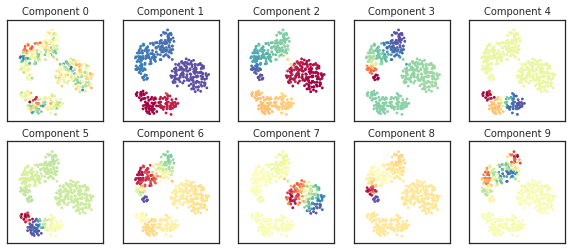

In [10]:
scdata.plot_diffusion_components()

In [9]:
guodf = pd.DataFrame(columns=['Wanderlust', 'Wishborne'], index=guo_data.index)

In [10]:
start_cell = 3

In [11]:
success = False
k=92
wb.run_wishbone(start_cell=start_cell, branch=False, k=k)

Building lNN graph...
lNN computed in : 0.40 seconds
Determining waypoints if not specified...
Determining shortest path distances and perspectives....
..........................................................................................................................................................................................................................................................
Time for determining distances and perspectives: 75.64 seconds
Running iterations...
Iteration: 2
Correlation with previous iteration:  0.9262
Iteration: 3
Correlation with previous iteration:  0.9284
Iteration: 4
Correlation with previous iteration:  0.9885
Iteration: 5
Correlation with previous iteration:  1.0000
4 realignment iterations


In [12]:
guodf['Wanderlust'] = wb.trajectory.copy()

In [14]:
scdata.tsne.shape

(437, 2)

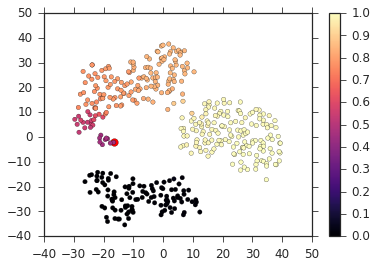

In [34]:
cm = plt.scatter(*scdata.tsne.values.T, c=guodf.Wanderlust, cmap='magma')
plt.scatter(*scdata.tsne.loc[start_cell].T, c='r', s=60, zorder=-1)
plt.colorbar(cm, ax=plt.gca())

In [23]:
import GPy
m = GPy.load('../../notebook/Guo/singlecellGuo.pickle')

In [30]:
X = m.X.mean[:, m.get_most_significant_input_dimensions()[:2]].values

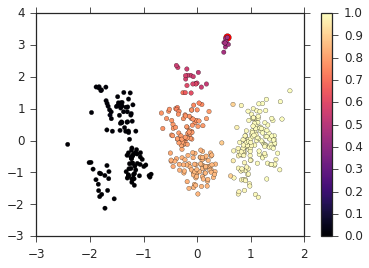

In [33]:
cm = plt.scatter(*X.T, c=guodf.Wanderlust, cmap='magma')
plt.scatter(*X[3], c='r', s=60, zorder=-1)
plt.colorbar(cm, ax=plt.gca())

 /home/maxz/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning:This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.


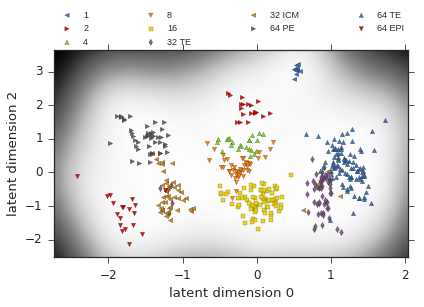

In [35]:
m.plot_latent(labels=labels)

In [ ]:
wb.run_wishbone(start_cell=start_cell, branch=True, k=k)
guodf['Wishbone'] = wb.trajectory.copy()

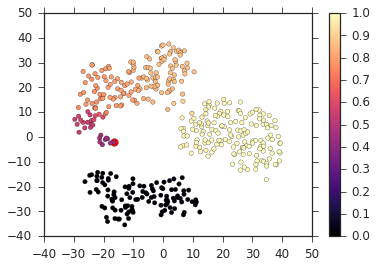

In [40]:
cm = plt.scatter(*scdata.tsne.values.T, c=guodf.Wishbone, cmap='magma')
plt.scatter(*scdata.tsne.loc[start_cell].T, c='r', s=60, zorder=-1)
plt.colorbar(cm, ax=plt.gca())

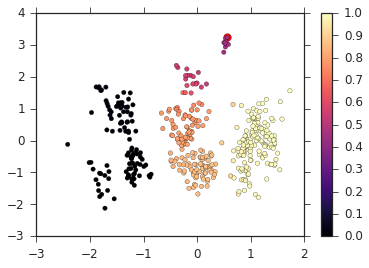

In [41]:
cm = plt.scatter(*X.T, c=guodf.Wishbone, cmap='magma')
plt.scatter(*X[3], c='r', s=60, zorder=-1)
plt.colorbar(cm, ax=plt.gca())

(<matplotlib.figure.Figure at 0x7f23899cba90>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2389958828>)

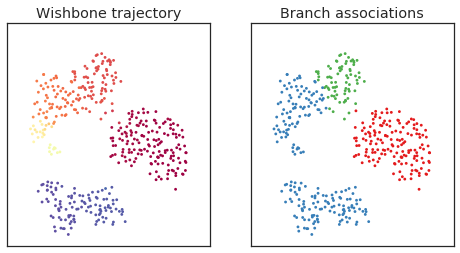

In [43]:
wb.plot_wishbone_on_tsne()